In [1]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import pickle
import pandas as pd
import numpy as np

In [2]:
import logging
import logging.handlers

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.DEBUG, format='[%(asctime)s]: %(levelname)s: %(message)s')

In [3]:
import matplotlib
%matplotlib inline  

In [26]:
matplotlib.rcParams['figure.figsize'] = [16, 16]

In [4]:
matplotlib.use('agg')
import matplotlib.pyplot as plt

/apps/python3/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/apps/gcc/5.2.0/python/3.6.1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/apps/gcc/5.2.0/python/3.6.1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/apps/python3/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/apps/python3/3.6.5/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/apps/python3/3.6.5/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
 

In [5]:
import copy

In [6]:
gbdt_clf = GradientBoostingClassifier(n_estimators = 500)
gbdt_reg = GradientBoostingRegressor(n_estimators = 500)

## Load variable names

In [7]:
with open('../saved_models/input_variables.pkl', 'rb') as f:
    names = pickle.load(f)

## Load data

In [8]:
input_path = "../../../data/hcup/nis/all_year_combination/cleaned_for_repcv_imputed.pickle"

In [9]:
def load_data_full(datafile, names, rescale = True):

    fn_pt_trn = pd.read_pickle(datafile)

    logger.info(list(fn_pt_trn.columns))

    fn_pt_trn.dropna(subset = ['DIED'], inplace = True)

    input_df_trn = fn_pt_trn[names]

    input_x_trn = input_df_trn.convert_objects(convert_numeric=True)
    input_y_died_trn = [int(x) for x in list(fn_pt_trn.DIED)]

    if rescale:
        scaler = preprocessing.StandardScaler().fit(input_x_trn)
        input_x_trn = scaler.transform(input_x_trn)
    X = input_x_trn
    y = input_y_died_trn
    y = np.asarray(y)

    return X, y

In [10]:
x, y = load_data_full(input_path, names, rescale = False)

[2019-10-15 12:07:05,757]: INFO: ['CCI', 'AGE', 'FEMALE', 'RACE_1', 'RACE_2', 'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'PAY1_1', 'PAY1_2', 'PAY1_3', 'PAY1_4', 'PAY1_5', 'PAY1_6', 'ZIPINC_QRTL_1', 'ZIPINC_QRTL_2', 'ZIPINC_QRTL_3', 'ZIPINC_QRTL_4', 'PL_NCHS', 'ASEASON_SPRING', 'ASEASON_SUMMER', 'ASEASON_FALL', 'ASEASON_WINTER', 'YEAR_2007', 'YEAR_2008', 'YEAR_2009', 'YEAR_2010', 'YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'AWEEKEND', 'ELECTIVE', 'TOTAL_DISC', 'HOSP_BEDSIZE', 'HOSP_REGION_1', 'HOSP_REGION_2', 'HOSP_REGION_3', 'HOSP_REGION_4', 'H_CONTRL_1', 'H_CONTRL_2', 'H_CONTRL_3', 'HOSP_LOCTEACH_1', 'HOSP_LOCTEACH_2', 'HOSP_LOCTEACH_3', 'HCUP_ED_0', 'HCUP_ED_1', 'HCUP_ED_2', 'HCUP_ED_3', 'HCUP_ED_4', 'NDX', 'NPR', 'NCHRONIC', 'DXCCS_131', 'DXCCS_249', 'DXCCS_107', 'DXCCS_157', 'DXCCS_2', 'DXCCS_122', 'DXCCS_257', 'DXCCS_59', 'DXCCS_259', 'DXCCS_244', 'PRCCS_216', 'PRCCS_225', 'PRCCS_54', 'PRCCS_222', 'PRCCS_224', 'PRCCS_37', 'PRCCS_65', 'PRCCS_223', 'PRCCS_231', 'PR

In [28]:
num_vars = ['HOSP_BEDSIZE', 'AGE', 'NDX', 'NPR', 'TOTAL_DISC', 'NCHRONIC',
                'PL_NCHS', 'CCI']

In [42]:
imp_vars = ['PRCCS_216', 'DXCCS_131', 'DXCCS_107', 'DXCCS_249', 'DXCCS_257', 'DXCCS_157', 
            'AGE', 'DXCCS_2', 'PRCCS_225', 'NDX', 'NPR', 'TOTAL_DISC', 'NCHRONIC', 'DXCCS_244', 'CCI']

In [29]:
imp_vars = ['AGE', 'NDX', 'NPR', 'TOTAL_DISC', 'NCHRONIC', 'CCI']

In [12]:
names_cpy = copy.deepcopy(names)

In [13]:
names_cpy[65]

'PRCCS_216'

In [14]:
names_cpy[65] = 'Respiratory intubation and mechanical ventilation'
names_cpy[55] = 'Respiratory failure; insufficiency; arrest (adult)'
names_cpy[57] = 'Cardiac arrest and ventricular fibrillation'
names_cpy[56] = 'Shock'
names_cpy[61] = 'Other aftercare'
names_cpy[58] = 'Acute and unspecified renal failure'
names_cpy[59] = 'Septicemia (except in labor)'
names_cpy[1] = 'Age'
names_cpy[66] = 'Conversion of cardiac rhythm'
names_cpy[52] = 'Number of diagnoses'
names_cpy[53] = 'Number of procedures'
names_cpy[35] = 'Total number of discharges in the hospital'
names_cpy[54] = 'Number of chronic conditions'
names_cpy[0] = 'Charlson\'s comorbidity index'
names_cpy[64] = 'Other injuries and conditions due to external causes'

## Fit model

In [15]:
#gbdt_clf.fit(x,y)

In [40]:
gbdt_reg.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
indexes = [names.index(i) for i in imp_vars]

In [44]:
indexes

[65, 55, 57, 56, 61, 58, 1, 59, 66, 52, 53, 35, 54, 64, 0]

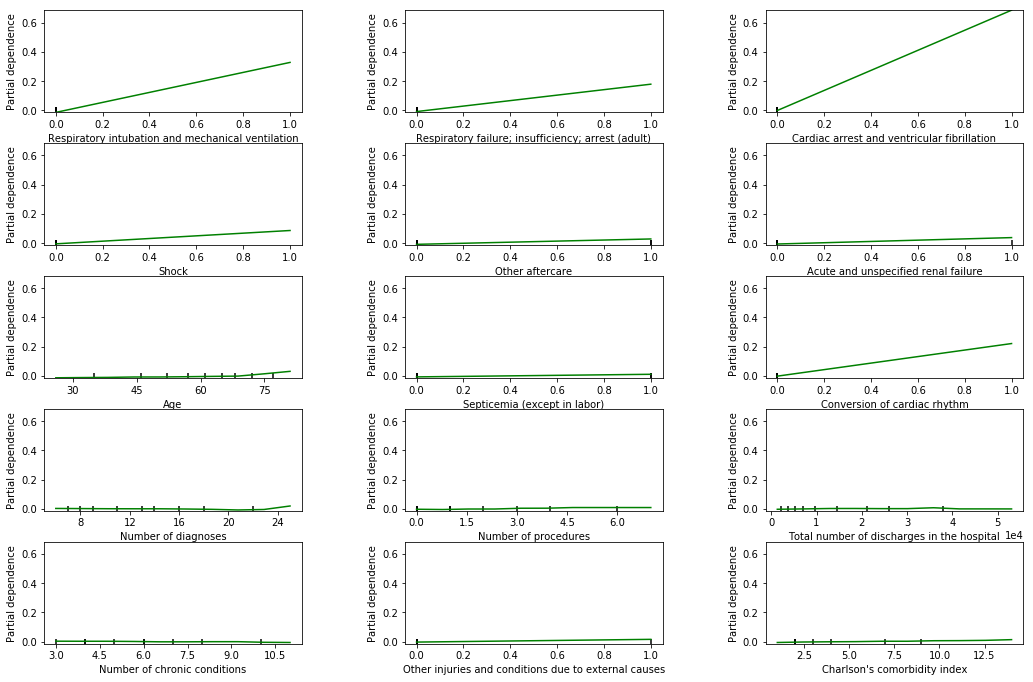

In [46]:
my_plots = plot_partial_dependence(gbdt_reg,       
                                   features=indexes, # column numbers of plots we want to show
                                   X=x,            # raw predictors data.
                                   feature_names=names_cpy, # labels on graphs
#                                   percentiles = (0.0, 0.90),
                                   grid_resolution=10)

In [47]:
names

['CCI',
 'AGE',
 'FEMALE',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_4',
 'RACE_5',
 'RACE_6',
 'PAY1_1',
 'PAY1_2',
 'PAY1_3',
 'PAY1_4',
 'PAY1_5',
 'PAY1_6',
 'ZIPINC_QRTL_1',
 'ZIPINC_QRTL_2',
 'ZIPINC_QRTL_3',
 'ZIPINC_QRTL_4',
 'PL_NCHS',
 'ASEASON_SPRING',
 'ASEASON_SUMMER',
 'ASEASON_FALL',
 'ASEASON_WINTER',
 'YEAR_2007',
 'YEAR_2008',
 'YEAR_2009',
 'YEAR_2010',
 'YEAR_2011',
 'YEAR_2012',
 'YEAR_2013',
 'YEAR_2014',
 'YEAR_2015',
 'AWEEKEND',
 'ELECTIVE',
 'TOTAL_DISC',
 'HOSP_BEDSIZE',
 'HOSP_REGION_1',
 'HOSP_REGION_2',
 'HOSP_REGION_3',
 'HOSP_REGION_4',
 'H_CONTRL_1',
 'H_CONTRL_2',
 'H_CONTRL_3',
 'HOSP_LOCTEACH_1',
 'HOSP_LOCTEACH_2',
 'HOSP_LOCTEACH_3',
 'HCUP_ED_0',
 'HCUP_ED_1',
 'HCUP_ED_2',
 'HCUP_ED_3',
 'HCUP_ED_4',
 'NDX',
 'NPR',
 'NCHRONIC',
 'DXCCS_131',
 'DXCCS_249',
 'DXCCS_107',
 'DXCCS_157',
 'DXCCS_2',
 'DXCCS_122',
 'DXCCS_257',
 'DXCCS_59',
 'DXCCS_259',
 'DXCCS_244',
 'PRCCS_216',
 'PRCCS_225',
 'PRCCS_54',
 'PRCCS_222',
 'PRCCS_224',
 'PRCCS_37',
 'PR